In [22]:
import pandas as pd
import requests
import os
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# Import Rotten Tomatoes bestofrt tsv file
df = pd.read_csv('bestofrt.tsv',sep='\t')

In [3]:
df.head()

,ranking,critic_score,title,number_of_critic_ratings
0,1,99,The Wizard of Oz (1939),110
1,2,100,Citizen Kane (1941),75
2,3,100,The Third Man (1949),77
3,4,99,Get Out (2017),282
4,5,97,Mad Max: Fury Road (2015),370


In [4]:
# record count
df.count()

ranking                     100
critic_score                100
title                       100
number_of_critic_ratings    100
dtype: int64

In [5]:
url = 'https://www.rottentomatoes.com/m/et_the_extraterrestrial'
response = requests.get(url)
print(response.status_code)

200


In [6]:
# # save response content html to file

# with open('https://www.rottentomatoes.com/m/et_the_extraterrestrial',mode = 'wb')as file:
#     file.write(response.content)

In [7]:
from bs4 import BeautifulSoup

In [8]:
soup = BeautifulSoup(response.content,'lxml')

In [9]:
os.getcwd()

'C:\\Users\\JC\\iCloudDrive\\portfolio\\movie'

In [10]:
# use static file handling instead, passing path to html file into file handler & bs constructor
with open('rt_html\et_the_extraterrestrial.html')as file:
    soup = BeautifulSoup(file,'lxml')

In [11]:
# find page title
soup.find('title')

<title>E.T. The Extra-Terrestrial (1982) - Rotten Tomatoes</title>

In [12]:
# find movie title, return tag children list
soup.find('title').contents

['E.T. The Extra-Terrestrial\xa0(1982) - Rotten Tomatoes']

In [13]:
# find movie title content str
soup.find('title').contents[0]

'E.T. The Extra-Terrestrial\xa0(1982) - Rotten Tomatoes'

In [14]:
# find movie title content str with slicing
x = soup.find('title').contents[0][:-len(' - Rotten Tomatoes')]

# remove nbsp
x= x.replace(u'\xa0', u' ')
print(x)

E.T. The Extra-Terrestrial (1982)


In [15]:
# Creates an empty list, df_list, to which dictionaries will be appended
df_list = []

In [16]:
os.listdir('rt_html')

['1000013-12_angry_men.html',
 '1000121-39_steps.html',
 '1000355-adventures_of_robin_hood.html',
 '1000626-all_about_eve.html',
 '1000642-all_quiet_on_the_western_front.html',
 '1003707-casablanca.html',
 '1007818-frankenstein.html',
 '1011615-king_kong.html',
 '1012007-laura.html',
 '1012928-m.html',
 '1013139-maltese_falcon.html',
 '1013775-metropolis.html',
 '1017289-rear_window.html',
 '1017293-rebecca.html',
 '1020333-streetcar_named_desire.html',
 '1021749-touch_of_evil.html',
 '1046060-high_noon.html',
 '1048445-snow_white_and_the_seven_dwarfs.html',
 '12_years_a_slave.html',
 '400_blows.html',
 'alien.html',
 'apocalypse_now.html',
 'argo_2012.html',
 'army_of_shadows.html',
 'arrival_2016.html',
 'baby_driver.html',
 'battleship_potemkin.html',
 'beatles_a_hard_days_night.html',
 'bicycle_thieves.html',
 'boyhood.html',
 'bride_of_frankenstein.html',
 'brooklyn.html',
 'citizen_kane.html',
 'dr_strangelove.html',
 'dunkirk_2017.html',
 'et_the_extraterrestrial.html',
 'findin

In [17]:
# Loop through each movie's Rotten Tomatoes HTML file in rt_html folder
for i in os.listdir('rt_html'):
    with open(os.path.join('rt_html',i))as file:
        soup = BeautifulSoup(file,'lxml')
        
        title = soup.find('title').contents[0][:-len(' - Rotten Tomatoes')]
        audience_score = soup.find('div',class_='audience-score meter').find('span').contents[0][:-1]
        
        num_audience_rating = soup.find('div',class_='audience-info hidden-xs superPageFontColor')
        num_audience_rating = num_audience_rating.find_all('div')[1].contents[2].strip().replace(',','')
        
        # Append to list of dictionaries
        df_list.append({'title': title,
                        'audience_score': int(audience_score),
                        'num_audience_rating': int(num_audience_rating)})

In [59]:
df_2 = pd.DataFrame(df_list, columns = ['title', 'audience_score','num_audience_rating'])
df_2.head()

,title,audience_score,num_audience_rating
0,12 Angry Men (Twelve Angry Men) (1957),97,103672
1,The 39 Steps (1935),86,23647
2,The Adventures of Robin Hood (1938),89,33584
3,All About Eve (1950),94,44564
4,All Quiet on the Western Front (1930),89,17768


In [38]:
df.head()

,ranking,critic_score,title,number_of_critic_ratings
0,1,99,The Wizard of Oz (1939),110
1,2,100,Citizen Kane (1941),75
2,3,100,The Third Man (1949),77
3,4,99,Get Out (2017),282
4,5,97,Mad Max: Fury Road (2015),370


In [52]:
# merge df and df2
result = pd.merge(df,df_2,how = 'outer',on = ['title'])

In [61]:
result.head()

,ranking,critic_score,title,number_of_critic_ratings,audience_score,num_audience_rating
0,1.0,99.0,The Wizard of Oz (1939),110.0,NaN,NaN
1,2.0,100.0,Citizen Kane (1941),75.0,NaN,NaN
2,3.0,100.0,The Third Man (1949),77.0,NaN,NaN
3,4.0,99.0,Get Out (2017),282.0,NaN,NaN
4,5.0,97.0,Mad Max: Fury Road (2015),370.0,NaN,NaN


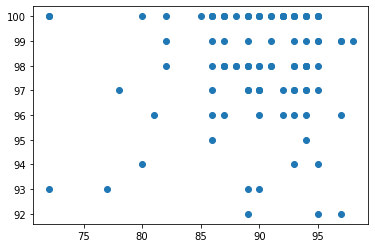

In [65]:
plt.scatter(df_2.audience_score,df.critic_score)